In [2]:
# %pip install numpy
# %pip install pandas
# %pip install scikit-learn
# %pip install tensorflow
# %pip install matplotlib
# %pip install statsmodels
# %pip install keras

In [3]:
import math
import pandas as pd
import numpy as np

from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Membaca file CSV dan menyimpannya ke dalam DataFrame
df = pd.read_csv('SIDO.csv')

# Mengubah kolom 'Date' menjadi tipe data datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,270.435486,270.435486,270.435486,270.435486,202.735489,0
2018-01-02,272.916565,280.359741,265.473389,267.954437,200.875534,9840956
2018-01-03,267.954437,275.397613,265.473389,272.916565,204.595444,17716624
2018-01-04,275.397613,275.397613,270.435486,272.916565,204.595444,2728068
2018-01-05,272.916565,290.283966,270.435486,282.840790,212.035324,35399190
...,...,...,...,...,...,...
2023-05-09,805.000000,805.000000,795.000000,800.000000,800.000000,18328100
2023-05-10,800.000000,805.000000,770.000000,775.000000,775.000000,37593900
2023-05-11,775.000000,775.000000,755.000000,775.000000,775.000000,19482700


In [6]:
# Membagi data menjadi data latihan (80%) dan data pengujian (20%)
train_data = df[:int(len(df) * 0.8)]
test_data = df[int(len(df) * 0.8):]

In [7]:
model_arima = sm.tsa.ARIMA(df['Close'], order=(1, 0, 1)) 
model_arima_fit = model_arima.fit()

c:\Users\dhori\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dhori\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dhori\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [8]:
# # Membuat model ARIMA
# model = ARIMA(train_data['Close'], order=(1, 0, 1))
# model_fit = model.fit()


In [9]:
# Melakukan prediksi pada data pengujian
predictions = model_arima_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

C:\Users\dhori\AppData\Local\Temp\ipykernel_10104\1330944916.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


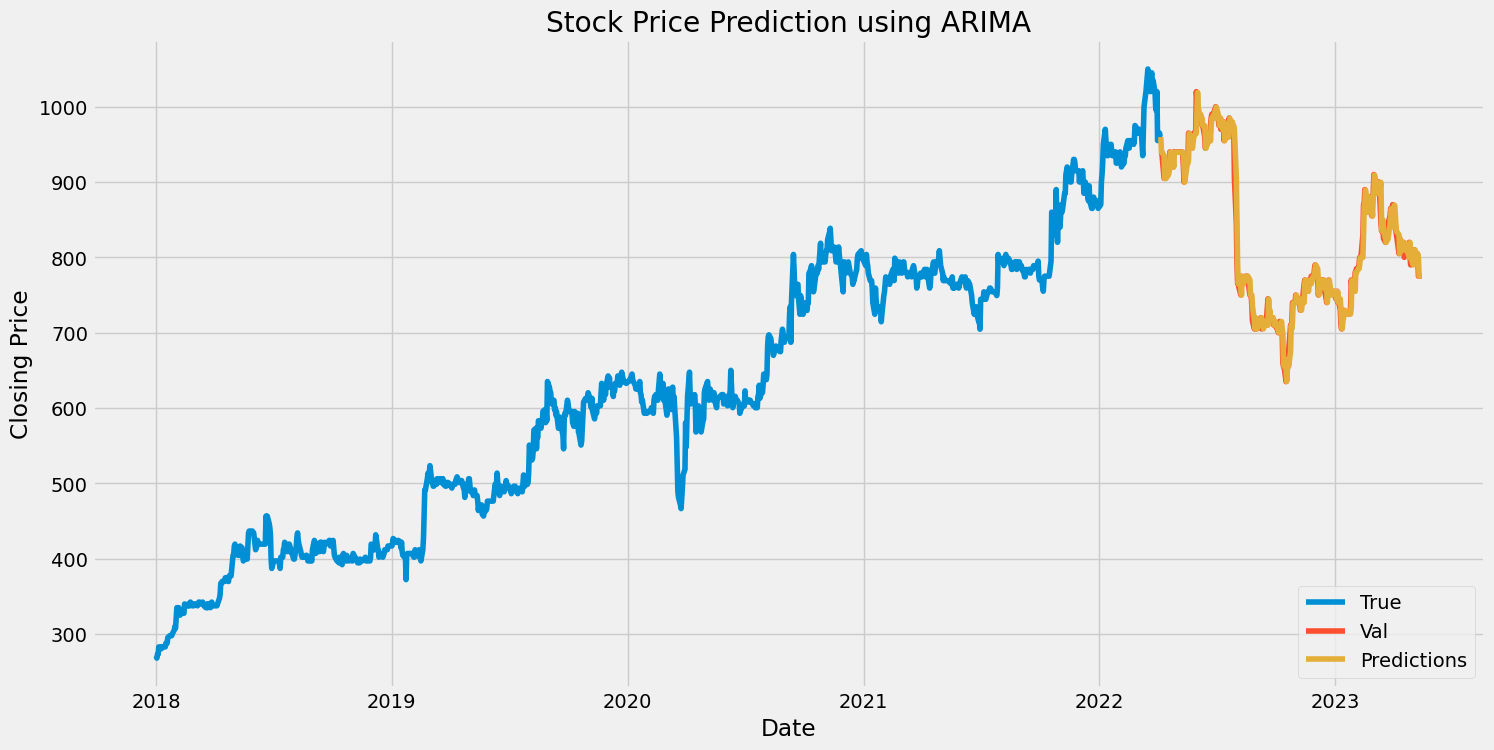

In [10]:
data = df.filter(['Close'])

train = data[:math.ceil(len(data.values)*.8)]
valid = data[math.ceil(len(data.values)*.8):]
valid['Predictions'] = predictions

# Menampilkan grafik hasil prediksi
plt.figure(figsize=(16, 8))
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Price Prediction using ARIMA')
plt.legend(['True', 'Val', 'Predictions'], loc = 'lower right')
plt.show()



# # Plot the data
# train = data[:training_data_len]
# valid = data[training_data_len:]
# valid['Predictions'] = predictions

# Visualize the data
# plt.figure(figsize=(16,8))
# plt.title('Stock Price Prediction using ARIMA')
# plt.xlabel('Date', fontsize=18)
# plt.ylabel('Close Price USD', fontsize=18)
# plt.plot(train['Close'])
# plt.plot(valid[['Close','Predictions']])
# plt.legend(['True', 'Val', 'Predictions'], loc = 'lower right')
# plt.show()

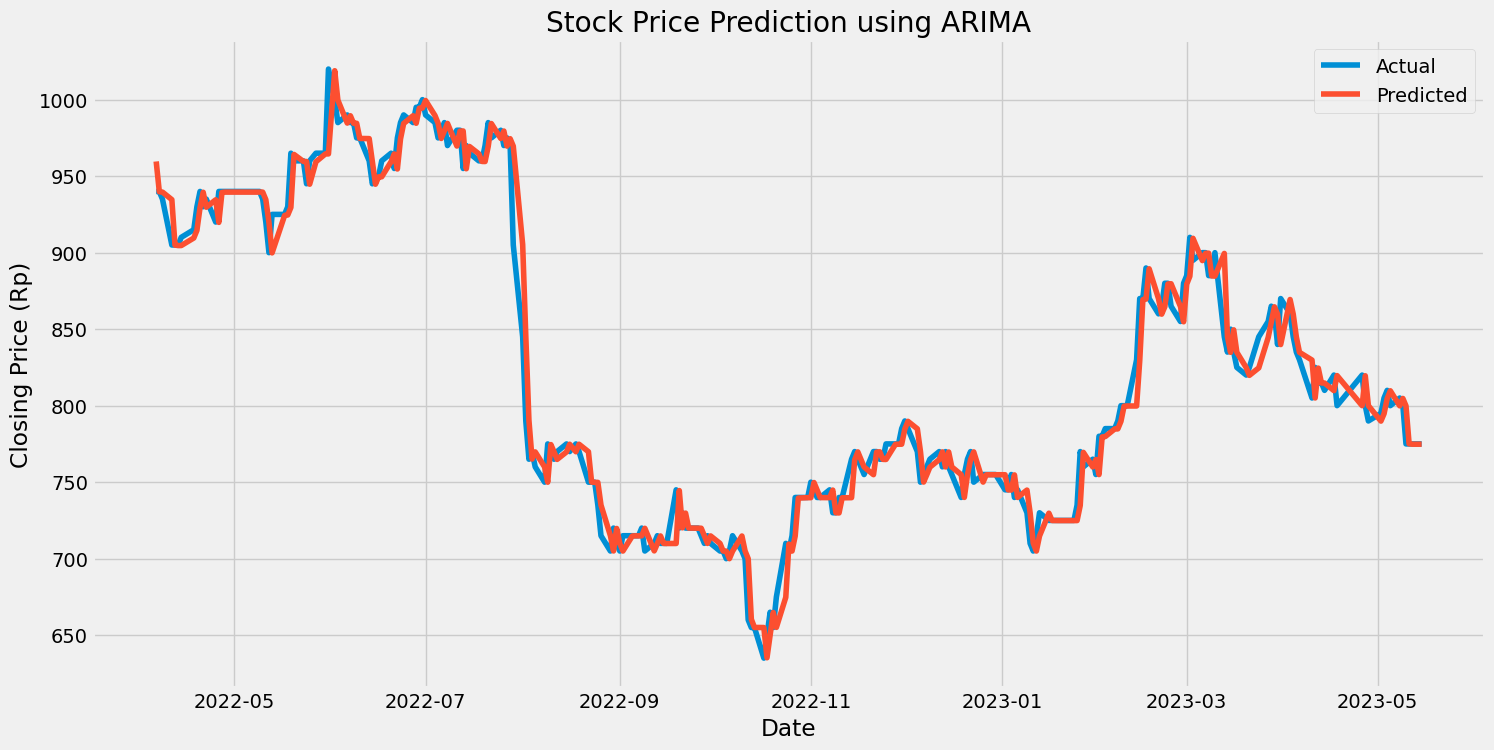

In [11]:
# Menampilkan grafik hasil prediksi
plt.figure(figsize=(16, 8))
plt.plot(test_data.index, test_data['Close'], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price (Rp)')
plt.title('Stock Price Prediction using ARIMA')
plt.legend()
plt.show()


In [12]:
# Menghitung nilai prediksi
predicted_values = model_arima_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Menghitung MAE
# mae = mean_absolute_error(test_data['Close'], predicted_values)

# Menghitung MSE
# mse = mean_squared_error(test_data['Close'], predicted_values)
mse = np.mean(predicted_values - test_data['Close'])**2
rmse = np.sqrt(np.mean(predicted_values- test_data['Close'])**2)
mape = np.mean((np.abs(predicted_values - test_data['Close']) / test_data['Close']) * 100)

# Menghitung RMSE
# rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE):', mape) # mape
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 1.2383195478390523
Mean Squared Error (MSE): 0.20476214583186453
Root Mean Squared Error (RMSE): 0.45250651468444575
